In [1]:
#!pip install openpyxl

In [2]:
# libraries
import pandas as pd
import numpy as np
import functools as ft
import seaborn as sns
import matplotlib.pyplot as plt
# modelacion
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

# encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler

# seleccion de modelos
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
# seleccion de modelos
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc,
    roc_auc_score
)


#otros
import time
import warnings
warnings.filterwarnings('ignore')

# Carga de datos    

### Dataset aural analytics

In [3]:
# aural analytics
ft_aural_analytics = pd.read_csv("/home/estebanm/Escritorio/docs_tfm/GAP Biohermes/GAP BioHermes/DigitalTests/Aural Analytics/FT_AURAL_ANALYTICS.csv")
ft_aural_analytics.head(3)

,STUDYID,DOMAIN,USUBJID,FTSEQ,FTGRPID,FTREFID,FTTESTCD,FTTEST,FTTSTDTL,FTCAT,...,FTACPTFL,FTREPNUM,VISITNUM,VISIT,EPOCH,FTDTC,FTENDTC,FTDY,FTENDY,DANAFL
0,BIO-HERMES,FT,BIO-HERMES-00101-001,103,3FCDC918-B377-461B-B43E-CB79531DA20A,3FCDC918-B377-461B-B43E-CB79531DA20A,CA35F5C5,MEAN IMAGE DESCR VOLITION 2,Aggregate,SPEECH METRICS,...,NaN,NaN,1,Screening,OBSERVATION,2021-06-04T14:16:17-04:00,NaN,1,NaN,NaN
1,BIO-HERMES,FT,BIO-HERMES-00101-001,104,4232A651-8EEC-4594-B8E5-154EC5AB7450,4232A651-8EEC-4594-B8E5-154EC5AB7450,CA35F5C5,MEAN IMAGE DESCR VOLITION 2,Aggregate,SPEECH METRICS,...,NaN,NaN,3,Follow-up,OBSERVATION,2021-06-28T09:32:22-04:00,NaN,25,NaN,NaN
2,BIO-HERMES,FT,BIO-HERMES-00101-001,105,3FCDC918-B377-461B-B43E-CB79531DA20A,3FCDC918-B377-461B-B43E-CB79531DA20A,CA37153B,MEAN DELAYED STORY RECALL SCORE,Aggregate,SPEECH METRICS,...,NaN,NaN,1,Screening,OBSERVATION,2021-06-04T14:16:17-04:00,NaN,1,NaN,NaN


####  Revisiones Generales

In [4]:
ft_aural_analytics['FTDTC'].min()

'2021-04-21T17:00:27-04:00'

In [5]:
ft_aural_analytics['FTDTC'].max()

'2023-01-30T13:08:44-05:00'

In [6]:
#ft_aural_analytics = ft_aural_analytics[ft_aural_analytics['USUBJID'] == 'BIO-HERMES-00103-001']
#ft_aural_analytics 

In [7]:
# Son muestras a traves del tiempo en este caso 12 periodos de tiempo
ft_aural_analytics['FTDTC'].value_counts()

FTDTC
2021-06-04T14:16:17-04:00    12
2021-06-28T09:32:22-04:00    12
2021-06-10T13:20:47-04:00    12
2021-07-16T08:52:31-04:00    12
2021-06-11T11:42:50-04:00    12
                             ..
2023-01-20T11:09:11-05:00    12
2022-09-30T15:13:35-04:00    12
2022-12-21T11:42:10-05:00    12
2022-10-24T15:53:59-04:00    12
2023-01-30T13:08:44-05:00    12
Name: count, Length: 1825, dtype: int64

In [8]:
#ft_aural_analytics = ft_aural_analytics[ft_aural_analytics['FTDTC'] == '2021-04-21T17:00:27-04:00']

In [9]:
ft_aural_analytics['USUBJID'].value_counts()

USUBJID
BIO-HERMES-00117-003    36
BIO-HERMES-00107-049    24
BIO-HERMES-00107-050    24
BIO-HERMES-00107-051    24
BIO-HERMES-00109-006    24
                        ..
BIO-HERMES-00114-015    12
BIO-HERMES-00114-016    12
BIO-HERMES-00114-018    12
BIO-HERMES-00114-020    12
BIO-HERMES-00114-021    12
Name: count, Length: 977, dtype: int64

In [10]:
ft_aural_analytics.shape

(21900, 34)

<Axes: >

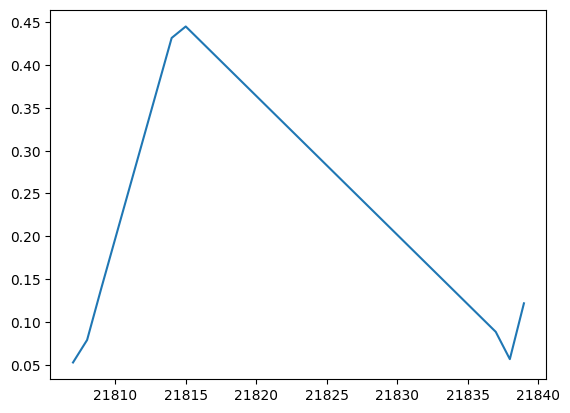

In [11]:
from datetime import datetime
datas = ft_aural_analytics[(ft_aural_analytics['USUBJID'] == 'BIO-HERMES-00117-003') & (ft_aural_analytics['FTORRESU'] == 'RATIO')]
datas['FTSTRESC'].plot()

<Axes: >

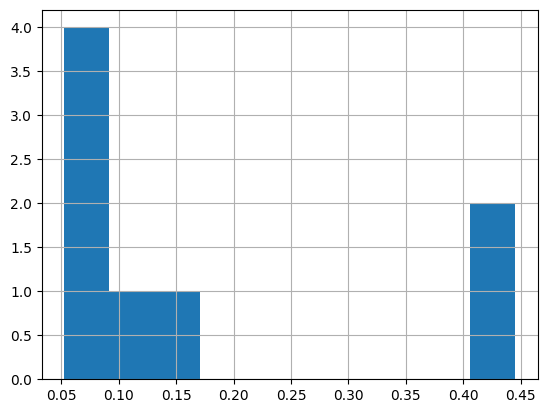

In [12]:
datas['FTSTRESC'].hist()

In [13]:
ft_aural_analytics.isnull().sum()

STUDYID         0
DOMAIN          0
USUBJID         0
FTSEQ           0
FTGRPID         0
FTREFID         0
FTTESTCD        0
FTTEST          0
FTTSTDTL        0
FTCAT           0
FTORRES      1046
FTORRESU     1046
FTORNRLO    21900
FTORNRHI    21900
FTSTRESC     1046
FTSTRESN     1046
FTSTRESU     1046
FTSTNRLO    21900
FTSTNRHI    21900
FTNRIND     21900
FTSTAT      20854
FTREASND    20854
FTNAM           0
FTEVALID    21900
FTACPTFL    21900
FTREPNUM    21900
VISITNUM        0
VISIT           0
EPOCH          48
FTDTC           0
FTENDTC     21900
FTDY            0
FTENDY      21900
DANAFL      21900
dtype: int64

In [14]:
ft_aural_analytics = ft_aural_analytics[['USUBJID', 'FTORRES', 'FTORRESU', 
                                        'FTSTRESC', 'FTSTRESN', 'FTSTRESU', 'FTSTNRLO', 'FTSTNRHI',
                                          'FTDY', 'FTDTC']]
ft_aural_analytics.head(30)

,USUBJID,FTORRES,FTORRESU,FTSTRESC,FTSTRESN,FTSTRESU,FTSTNRLO,FTSTNRHI,FTDY,FTDTC
0,BIO-HERMES-00101-001,28.0000,words,28.0000,28.0000,words,NaN,NaN,1,2021-06-04T14:16:17-04:00
1,BIO-HERMES-00101-001,26.0000,words,26.0000,26.0000,words,NaN,NaN,25,2021-06-28T09:32:22-04:00
2,BIO-HERMES-00101-001,0.3947,RATIO,0.3947,0.3947,RATIO,NaN,NaN,1,2021-06-04T14:16:17-04:00
3,BIO-HERMES-00101-001,0.1944,RATIO,0.1944,0.1944,RATIO,NaN,NaN,25,2021-06-28T09:32:22-04:00
4,BIO-HERMES-00101-001,5.0000,count,5.0000,5.0000,count,NaN,NaN,1,2021-06-04T14:16:17-04:00
5,BIO-HERMES-00101-001,4.0000,count,4.0000,4.0000,count,NaN,NaN,25,2021-06-28T09:32:22-04:00
6,BIO-HERMES-00101-001,0.5118,RATIO,0.5118,0.5118,RATIO,NaN,NaN,1,2021-06-04T14:16:17-04:00
7,BIO-HERMES-00101-001,0.4829,RATIO,0.4829,0.4829,RATIO,NaN,NaN,25,2021-06-28T09:32:22-04:00
8,BIO-HERMES-00101-001,5.0000,s,5.0000,5.0000,s,NaN,NaN,1,2021-06-04T14:16:17-04:00
9,BIO-HERMES-00101-001,9.2600,s,9.2600,9.2600,s,NaN,NaN,25,2021-06-28T09:32:22-04:00


In [15]:
ft_aural_analytics = ft_aural_analytics.groupby('USUBJID')[['FTORRES', 'FTORRESU', 
                                        'FTSTRESC', 'FTSTRESN', 'FTSTRESU', 'FTSTNRLO', 'FTSTNRHI',
                                          'FTDY', 'FTDTC']].first().reset_index()

In [16]:
# la cantidad de pacientes no es homogenea
ft_aural_analytics['USUBJID'].value_counts()

USUBJID
BIO-HERMES-00101-001    1
BIO-HERMES-00101-002    1
BIO-HERMES-00101-003    1
BIO-HERMES-00101-004    1
BIO-HERMES-00101-005    1
                       ..
BIO-HERMES-00116-003    1
BIO-HERMES-00117-003    1
BIO-HERMES-00117-006    1
BIO-HERMES-00117-009    1
BIO-HERMES-00117-010    1
Name: count, Length: 977, dtype: int64

In [17]:
ft_aural_analytics

,USUBJID,FTORRES,FTORRESU,FTSTRESC,FTSTRESN,FTSTRESU,FTSTNRLO,FTSTNRHI,FTDY,FTDTC
0,BIO-HERMES-00101-001,28.0,words,28.0,28.0,words,NaN,NaN,1,2021-06-04T14:16:17-04:00
1,BIO-HERMES-00101-002,16.0,words,16.0,16.0,words,NaN,NaN,1,2021-06-10T13:20:47-04:00
2,BIO-HERMES-00101-003,31.0,words,31.0,31.0,words,NaN,NaN,1,2021-06-11T11:42:50-04:00
3,BIO-HERMES-00101-004,18.5,words,18.5,18.5,words,NaN,NaN,1,2021-06-14T14:46:17-04:00
4,BIO-HERMES-00101-005,11.5,words,11.5,11.5,words,NaN,NaN,1,2021-06-21T14:20:15-04:00
...,...,...,...,...,...,...,...,...,...,...
972,BIO-HERMES-00116-003,0.0,RATIO,0.0,0.0,RATIO,NaN,NaN,1,2022-09-16T13:13:48-04:00
973,BIO-HERMES-00117-003,24.5,words,24.5,24.5,words,NaN,NaN,-3,2022-08-19T16:23:33-04:00
974,BIO-HERMES-00117-006,39.5,words,39.5,39.5,words,NaN,NaN,122,2023-01-20T11:09:11-05:00
975,BIO-HERMES-00117-009,62.0,words,62.0,62.0,words,NaN,NaN,1,2022-09-30T15:13:35-04:00


### Dataset cognivue

In [18]:
ft_cognivue = pd.read_csv("/home/estebanm/Escritorio/docs_tfm/GAP Biohermes/GAP BioHermes/DigitalTests/Cognivue/FT_COGNIVUE.csv")
ft_cognivue.head(3)

,STUDYID,DOMAIN,USUBJID,FTSEQ,FTGRPID,FTREFID,FTTESTCD,FTTEST,FTTSTDTL,FTCAT,...,FTACPTFL,FTREPNUM,VISITNUM,VISIT,EPOCH,FTDTC,FTENDTC,FTDY,FTENDY,DANAFL
0,BIO-HERMES,FT,BIO-HERMES-00101-001,13,1,NaN,CCCA101,Adaptive Motor Control Subtest,NaN,CCCA,...,Y,NaN,1,Screening,OBSERVATION,2021-06-04T13:30,2021-06-04T13:40,1,1,NaN
1,BIO-HERMES,FT,BIO-HERMES-00101-001,14,1,NaN,CCCA102,Visual Salience Subtest,NaN,CCCA,...,Y,NaN,1,Screening,OBSERVATION,2021-06-04T13:30,2021-06-04T13:40,1,1,NaN
2,BIO-HERMES,FT,BIO-HERMES-00101-001,15,1,NaN,CCCA103,Letter Discrimination Subtest,NaN,CCCA,...,Y,NaN,1,Screening,OBSERVATION,2021-06-04T13:30,2021-06-04T13:40,1,1,NaN


In [19]:
ft_cognivue.shape

(24024, 34)

In [20]:
ft_cognivue.isnull().sum()

STUDYID         0
DOMAIN          0
USUBJID         0
FTSEQ           0
FTGRPID         0
FTREFID     24024
FTTESTCD        0
FTTEST          0
FTTSTDTL    24024
FTCAT           0
FTORRES       839
FTORRESU    12496
FTORNRLO     2002
FTORNRHI     2002
FTSTRESC      839
FTSTRESN     1840
FTSTRESU    12496
FTSTNRLO     2002
FTSTNRHI     2002
FTNRIND     16122
FTSTAT      23185
FTREASND    23185
FTNAM           0
FTEVALID    24024
FTACPTFL        0
FTREPNUM    24024
VISITNUM        0
VISIT           0
EPOCH           0
FTDTC           0
FTENDTC         0
FTDY            0
FTENDY          0
DANAFL      24024
dtype: int64

In [21]:
ft_cognivue['FTDTC'].value_counts()  # muestra cada t-times 

FTDTC
2022-01-06T11:30    48
2021-09-15T12:01    48
2022-03-16T12:31    48
2022-02-14T12:45    48
2022-01-31T11:28    48
                    ..
2021-08-12T11:46    24
2021-08-13T11:50    24
2021-08-13T12:55    24
2021-08-16T11:10    24
2021-08-02T10:44    24
Name: count, Length: 993, dtype: int64

In [22]:
ft_cognivue['FTENDTC'].value_counts()

FTENDTC
2021-07-28T13:24    48
2021-08-02T13:12    48
2021-09-07T11:55    48
2021-09-17T13:16    48
2021-08-05T12:16    48
                    ..
2021-08-12T12:03    24
2021-08-13T12:05    24
2021-08-13T13:10    24
2021-08-16T11:30    24
2021-07-29T12:25    24
Name: count, Length: 995, dtype: int64

In [23]:
ft_cognivue['USUBJID'].value_counts() # pacientes homogeneos

USUBJID
BIO-HERMES-00101-001    24
BIO-HERMES-00101-002    24
BIO-HERMES-00101-003    24
BIO-HERMES-00101-004    24
BIO-HERMES-00101-005    24
                        ..
BIO-HERMES-00117-002    24
BIO-HERMES-00117-003    24
BIO-HERMES-00117-006    24
BIO-HERMES-00117-009    24
BIO-HERMES-00117-010    24
Name: count, Length: 1001, dtype: int64

In [24]:
#ft_cognivue = ft_cognivue[ft_cognivue['USUBJID']== 'BIO-HERMES-00101-001']
#ft_cognivue.head(30)

In [25]:
ft_cognivue = ft_cognivue[['USUBJID', 'FTSEQ', 'FTGRPID', 'FTTESTCD', 'FTTEST',
                           'FTCAT', 'FTORRES', 'FTORRESU', 'FTORNRLO', 'FTORNRHI',
                           'FTSTRESC', 'FTSTRESN', 'FTSTRESU', 'FTSTNRLO', 'FTSTNRHI', 'FTNRIND', 
                            'FTACPTFL', 'FTDY', 'FTENDY', 	'FTDTC']]
ft_cognivue.head(3)

,USUBJID,FTSEQ,FTGRPID,FTTESTCD,FTTEST,FTCAT,FTORRES,FTORRESU,FTORNRLO,FTORNRHI,FTSTRESC,FTSTRESN,FTSTRESU,FTSTNRLO,FTSTNRHI,FTNRIND,FTACPTFL,FTDY,FTENDY,FTDTC
0,BIO-HERMES-00101-001,13,1,CCCA101,Adaptive Motor Control Subtest,CCCA,23,NaN,44.0,60.0,23,23.0,NaN,44.0,60.0,LOW,Y,1,1,2021-06-04T13:30
1,BIO-HERMES-00101-001,14,1,CCCA102,Visual Salience Subtest,CCCA,62,NaN,68.0,85.0,62,62.0,NaN,68.0,85.0,LOW,Y,1,1,2021-06-04T13:30
2,BIO-HERMES-00101-001,15,1,CCCA103,Letter Discrimination Subtest,CCCA,53,NaN,59.0,79.0,53,53.0,NaN,59.0,79.0,LOW,Y,1,1,2021-06-04T13:30


### Dataset DM

In [26]:
dt_dm = pd.read_csv("/home/estebanm/Escritorio/docs_tfm/GAP Biohermes/GAP BioHermes/GAP-Clinical/DM.csv")
dt_dm.head(3)

,STUDYID,DOMAIN,USUBJID,SUBJID,RFSTDTC,RFENDTC,RFXSTDTC,RFXENDTC,RFICDTC,RFPENDTC,...,SEX,RACE,ETHNIC,ARMCD,ARM,ACTARMCD,ACTARM,ARMNRS,ACTARMUD,COUNTRY
0,BIO-HERMES,DM,BIO-HERMES-00101-001,00101-001,2021-06-04,2021-07-28,NaN,NaN,2021-06-04T11:07,2021-07-28,...,F,WHITE,NOT HISPANIC OR LATINO,OBSGRP,Observation Group,OBSGRP,Observation Group,NaN,NaN,USA
1,BIO-HERMES,DM,BIO-HERMES-00101-002,00101-002,2021-06-10,2021-07-16,NaN,NaN,2021-06-10T11:17,2021-07-16,...,M,WHITE,NOT HISPANIC OR LATINO,OBSGRP,Observation Group,OBSGRP,Observation Group,NaN,NaN,USA
2,BIO-HERMES,DM,BIO-HERMES-00101-003,00101-003,2021-06-11,2021-07-30,NaN,NaN,2021-06-11T09:30,2021-07-30,...,M,WHITE,NOT HISPANIC OR LATINO,OBSGRP,Observation Group,OBSGRP,Observation Group,NaN,NaN,USA


In [27]:
dt_dm.shape

(1005, 25)

In [28]:
dt_dm.isnull().sum()

STUDYID        0
DOMAIN         0
USUBJID        0
SUBJID         0
RFSTDTC        0
RFENDTC        1
RFXSTDTC    1005
RFXENDTC    1005
RFICDTC        0
RFPENDTC       0
DTHDTC      1005
DTHFL       1005
SITEID         0
AGE            0
AGEU           0
SEX            0
RACE           0
ETHNIC         0
ARMCD          4
ARM            4
ACTARMCD       4
ACTARM         4
ARMNRS      1001
ACTARMUD    1005
COUNTRY        0
dtype: int64

In [29]:
dt_dm['USUBJID'].value_counts()  # pacientes unitarios

USUBJID
BIO-HERMES-00101-001    1
BIO-HERMES-00101-002    1
BIO-HERMES-00101-003    1
BIO-HERMES-00101-004    1
BIO-HERMES-00101-005    1
                       ..
BIO-HERMES-00117-002    1
BIO-HERMES-00117-003    1
BIO-HERMES-00117-006    1
BIO-HERMES-00117-009    1
BIO-HERMES-00117-010    1
Name: count, Length: 1005, dtype: int64

In [30]:
dt_dm['RFICDTC'].value_counts()

RFICDTC
2021-09-10T09:20    2
2022-02-14T10:06    2
2022-01-24T09:25    2
2022-02-18T09:30    2
2022-02-22T10:05    2
                   ..
2021-08-12T09:59    1
2021-08-13T10:12    1
2021-08-13T11:25    1
2021-08-16T09:50    1
2021-07-29T09:30    1
Name: count, Length: 986, dtype: int64

In [31]:
dt_dm['RFPENDTC'].value_counts() # concentraciones en algunos dias

RFPENDTC
2021-10-06    10
2022-02-01    10
2022-04-08     9
2022-01-11     9
2021-10-19     8
              ..
2022-12-05     1
2023-02-08     1
2022-09-28     1
2023-01-23     1
2023-01-30     1
Name: count, Length: 359, dtype: int64

In [32]:
dt_dm = dt_dm[['USUBJID', 'SUBJID', 'RFSTDTC', 
                       'RFPENDTC', 'SITEID', 'AGE', 'AGEU',
                           'SEX', 'RACE', 'ETHNIC', 'ARM']]
dt_dm.head(10)

,USUBJID,SUBJID,RFSTDTC,RFPENDTC,SITEID,AGE,AGEU,SEX,RACE,ETHNIC,ARM
0,BIO-HERMES-00101-001,00101-001,2021-06-04,2021-07-28,101,68,YEARS,F,WHITE,NOT HISPANIC OR LATINO,Observation Group
1,BIO-HERMES-00101-002,00101-002,2021-06-10,2021-07-16,101,75,YEARS,M,WHITE,NOT HISPANIC OR LATINO,Observation Group
2,BIO-HERMES-00101-003,00101-003,2021-06-11,2021-07-30,101,71,YEARS,M,WHITE,NOT HISPANIC OR LATINO,Observation Group
3,BIO-HERMES-00101-004,00101-004,2021-06-14,2021-07-21,101,84,YEARS,M,WHITE,NOT HISPANIC OR LATINO,Observation Group
4,BIO-HERMES-00101-005,00101-005,2021-06-21,2021-07-26,101,80,YEARS,F,WHITE,NOT HISPANIC OR LATINO,Observation Group
5,BIO-HERMES-00101-006,00101-006,2021-06-22,2021-08-23,101,69,YEARS,F,WHITE,NOT HISPANIC OR LATINO,Observation Group
6,BIO-HERMES-00101-007,00101-007,2021-06-24,2021-08-12,101,77,YEARS,M,WHITE,NOT HISPANIC OR LATINO,Observation Group
7,BIO-HERMES-00101-008,00101-008,2021-07-09,2021-09-27,101,64,YEARS,M,WHITE,NOT HISPANIC OR LATINO,Observation Group
8,BIO-HERMES-00101-009,00101-009,2021-07-13,2021-08-26,101,80,YEARS,F,WHITE,NOT HISPANIC OR LATINO,Observation Group
9,BIO-HERMES-00101-010,00101-010,2021-07-15,2021-09-09,101,78,YEARS,F,WHITE,NOT HISPANIC OR LATINO,Observation Group


## Dataset MH

In [33]:

# Primer filtro === NO VA EN EL PROCESO
"""

revisar la variable MHTERM para buscar el tipo de enfermedad: 
Dementia
Alzheimer's Disease
Alzheimer's

SUBJID/USUBJID
"""
dt_mh = pd.read_csv("/home/estebanm/Escritorio/docs_tfm/GAP Biohermes/GAP BioHermes/GAP-Clinical/MH.csv")
dt_mh.head(3)

,STUDYID,DOMAIN,USUBJID,MHSEQ,MHSPID,MHTERM,MHLLT,MHLLTCD,MHDECOD,MHPTCD,...,MHSOCCD,EPOCH,MHSTDTC,MHENDTC,MHSTDY,MHENDY,MHSTRTPT,MHSTTPT,MHENRTPT,MHENTPT
0,BIO-HERMES,MH,BIO-HERMES-00101-001,1,4.0,Anxiety,Anxiety,10002855,Anxiety,10002855,...,10037175,NaN,2006-01-01,NaN,-5633.0,NaN,NaN,NaN,ONGOING,2021-07-28
1,BIO-HERMES,MH,BIO-HERMES-00101-001,2,1.0,Bipolar disorder,Bipolar disorder,10057667,Bipolar disorder,10057667,...,10037175,NaN,2005-01-01,NaN,-5998.0,NaN,NaN,NaN,ONGOING,2021-07-28
2,BIO-HERMES,MH,BIO-HERMES-00101-001,3,NaN,Mild Cognitive Impairment,Cognitive impairment,10009846,Cognitive disorder,10057668,...,10029205,NaN,2020-01-01,NaN,-520.0,NaN,BEFORE,3 MONTHS BEFORE SCREENING,NaN,NaN


In [34]:
dt_mh.shape

(9758, 32)

In [35]:
dt_mh.isnull().sum()

STUDYID        0
DOMAIN         0
USUBJID        0
MHSEQ          0
MHSPID      1691
MHTERM         0
MHLLT          0
MHLLTCD        0
MHDECOD        0
MHPTCD         0
MHHLT          0
MHHLTCD        0
MHHLGT         0
MHHLGTCD       0
MHEVDTYP    9072
MHPRESP     8753
MHOCCUR     8753
MHSTAT      9758
MHREASND    9758
MHBODSYS       0
MHBDSYCD       0
MHSOC          0
MHSOCCD        0
EPOCH       9679
MHSTDTC      929
MHENDTC     8611
MHSTDY       929
MHENDY      8611
MHSTRTPT    9072
MHSTTPT     9072
MHENRTPT    2838
MHENTPT     2842
dtype: int64

In [36]:
dt_mh['USUBJID'].value_counts() # concentraciones en algunos pacientes, no homogeneidad

USUBJID
BIO-HERMES-00101-007    47
BIO-HERMES-00102-083    34
BIO-HERMES-00106-065    31
BIO-HERMES-00111-023    30
BIO-HERMES-00106-084    29
                        ..
BIO-HERMES-00105-050     2
BIO-HERMES-00107-022     2
BIO-HERMES-00112-011     1
BIO-HERMES-00112-003     1
BIO-HERMES-00101-071     1
Name: count, Length: 1005, dtype: int64

In [37]:
dt_mh['MHENTPT'].value_counts() # concentracion de muestras en algunos dias

MHENTPT
2022-04-13    81
2022-02-01    80
2022-04-08    72
2021-10-20    69
2021-09-15    63
              ..
2021-06-23     1
2022-02-21     1
2022-09-08     1
2022-08-05     1
2021-07-07     1
Name: count, Length: 357, dtype: int64

In [38]:
dt_mh = dt_mh[['USUBJID', 'MHSEQ', 'MHSPID', 'MHTERM', 
                       'MHBODSYS', 'MHENDTC', 'MHSTDY', 'MHSTDTC', 'MHENTPT']]
dt_mh.head(30)

,USUBJID,MHSEQ,MHSPID,MHTERM,MHBODSYS,MHENDTC,MHSTDY,MHSTDTC,MHENTPT
0,BIO-HERMES-00101-001,1,4.0,Anxiety,Psychiatric disorders,NaN,-5633.0,2006-01-01,2021-07-28
1,BIO-HERMES-00101-001,2,1.0,Bipolar disorder,Psychiatric disorders,NaN,-5998.0,2005-01-01,2021-07-28
2,BIO-HERMES-00101-001,3,NaN,Mild Cognitive Impairment,Nervous system disorders,NaN,-520.0,2020-01-01,NaN
3,BIO-HERMES-00101-001,4,NaN,Mild Cognitive Impairment,Nervous system disorders,NaN,-1615.0,2017-01-01,NaN
4,BIO-HERMES-00101-001,5,2.0,gastroesophageal reflux disease,Gastrointestinal disorders,NaN,-885.0,2019-01-01,2021-07-28
5,BIO-HERMES-00101-001,6,3.0,Hypertension,Vascular disorders,NaN,-885.0,2019-01-01,2021-07-28
6,BIO-HERMES-00101-001,7,5.0,Insomnia,Psychiatric disorders,NaN,-4172.0,2010-01-01,2021-07-28
7,BIO-HERMES-00101-001,8,6.0,General Arthritis,Musculoskeletal and connective tissue disorders,NaN,-4172.0,2010-01-01,2021-07-28
8,BIO-HERMES-00101-001,9,NaN,COVID-19 Positive Test,Investigations,NaN,NaN,NaN,NaN
9,BIO-HERMES-00101-002,1,4.0,Arthritis,Musculoskeletal and connective tissue disorders,NaN,-1987.0,2016-01-01,2021-07-16


## Dataset suppdm

In [39]:
# variable para crear y: QVAL
dt_suppdm = pd.read_csv("/home/estebanm/Escritorio/docs_tfm/GAP Biohermes/GAP BioHermes/GAP-Clinical/SUPPDM.csv")
dt_suppdm.head()

,STUDYID,RDOMAIN,USUBJID,IDVAR,IDVARVAL,QNAM,QLABEL,QVAL,QORIG,QEVAL
0,BIO-HERMES,DM,BIO-HERMES-00101-001,NaN,NaN,COHORT,Cohort Status,Cohort 2 (MCI),CRF,NaN
1,BIO-HERMES,DM,BIO-HERMES-00101-002,NaN,NaN,COHORT,Cohort Status,Cohort 2 (MCI),CRF,NaN
2,BIO-HERMES,DM,BIO-HERMES-00101-003,NaN,NaN,COHORT,Cohort Status,Cohort 1 (Healthy),CRF,NaN
3,BIO-HERMES,DM,BIO-HERMES-00101-004,NaN,NaN,COHORT,Cohort Status,Cohort 1 (Healthy),CRF,NaN
4,BIO-HERMES,DM,BIO-HERMES-00101-005,NaN,NaN,COHORT,Cohort Status,Cohort 1 (Healthy),CRF,NaN


In [40]:
dt_suppdm.shape

(1001, 10)

In [41]:
dt_suppdm.isnull().sum()

STUDYID        0
RDOMAIN        0
USUBJID        0
IDVAR       1001
IDVARVAL    1001
QNAM           0
QLABEL         0
QVAL           0
QORIG          0
QEVAL       1001
dtype: int64

In [42]:
dt_suppdm['USUBJID'].value_counts()

USUBJID
BIO-HERMES-00101-001    1
BIO-HERMES-00101-002    1
BIO-HERMES-00101-003    1
BIO-HERMES-00101-004    1
BIO-HERMES-00101-005    1
                       ..
BIO-HERMES-00117-002    1
BIO-HERMES-00117-003    1
BIO-HERMES-00117-006    1
BIO-HERMES-00117-009    1
BIO-HERMES-00117-010    1
Name: count, Length: 1001, dtype: int64

In [43]:
dt_suppdm['QVAL'].value_counts()

QVAL
Cohort 1 (Healthy)        417
Cohort 2 (MCI)            312
Cohort 3 (Probable AD)    272
Name: count, dtype: int64

In [44]:
dt_suppdm = dt_suppdm[['USUBJID', 'QLABEL', 'QVAL', 'QORIG']]
dt_suppdm.head(2)

,USUBJID,QLABEL,QVAL,QORIG
0,BIO-HERMES-00101-001,Cohort Status,Cohort 2 (MCI),CRF
1,BIO-HERMES-00101-002,Cohort Status,Cohort 2 (MCI),CRF


# Crear tabla Resumen

In [45]:
datas = dt_suppdm.merge(ft_cognivue, on="USUBJID").merge(ft_aural_analytics, on="USUBJID").merge(dt_dm, on="USUBJID")


In [46]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23376 entries, 0 to 23375
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   USUBJID     23376 non-null  object 
 1   QLABEL      23376 non-null  object 
 2   QVAL        23376 non-null  object 
 3   QORIG       23376 non-null  object 
 4   FTSEQ       23376 non-null  int64  
 5   FTGRPID     23376 non-null  int64  
 6   FTTESTCD    23376 non-null  object 
 7   FTTEST      23376 non-null  object 
 8   FTCAT       23376 non-null  object 
 9   FTORRES_x   22644 non-null  object 
 10  FTORRESU_x  11265 non-null  object 
 11  FTORNRLO    21428 non-null  float64
 12  FTORNRHI    21428 non-null  float64
 13  FTSTRESC_x  22644 non-null  object 
 14  FTSTRESN_x  21670 non-null  float64
 15  FTSTRESU_x  11265 non-null  object 
 16  FTSTNRLO_x  21428 non-null  float64
 17  FTSTNRHI_x  21428 non-null  float64
 18  FTNRIND     7660 non-null   object 
 19  FTACPTFL    23376 non-nul

In [47]:
datas = datas[['USUBJID', 'QVAL', 'FTGRPID', 'FTTESTCD', 
                'FTORRES_x', 'FTORNRLO', 'FTORNRHI', 'FTSTRESC_x', 
               'FTSTRESN_x', 'FTSTNRLO_x', 'FTSTNRHI_x', 'FTACPTFL', 'FTDY_x', 
               'FTENDY', 'FTDTC_x', 'FTORRES_y', 'FTORRESU_y', 'FTSTRESC_y', 'FTSTRESN_y', 'FTSTRESU_y', 
               'FTDY_y', 'FTDTC_y', 'RFSTDTC', 'RFPENDTC', 
               'AGE', 'SEX', 'RACE', 'ETHNIC']]

In [48]:
print(list(datas.columns))

['USUBJID', 'QVAL', 'FTGRPID', 'FTTESTCD', 'FTORRES_x', 'FTORNRLO', 'FTORNRHI', 'FTSTRESC_x', 'FTSTRESN_x', 'FTSTNRLO_x', 'FTSTNRHI_x', 'FTACPTFL', 'FTDY_x', 'FTENDY', 'FTDTC_x', 'FTORRES_y', 'FTORRESU_y', 'FTSTRESC_y', 'FTSTRESN_y', 'FTSTRESU_y', 'FTDY_y', 'FTDTC_y', 'RFSTDTC', 'RFPENDTC', 'AGE', 'SEX', 'RACE', 'ETHNIC']


In [49]:
print(datas.isnull().sum())

USUBJID          0
QVAL             0
FTGRPID          0
FTTESTCD         0
FTORRES_x      732
FTORNRLO      1948
FTORNRHI      1948
FTSTRESC_x     732
FTSTRESN_x    1706
FTSTNRLO_x    1948
FTSTNRHI_x    1948
FTACPTFL         0
FTDY_x           0
FTENDY           0
FTDTC_x          0
FTORRES_y      168
FTORRESU_y     168
FTSTRESC_y     168
FTSTRESN_y     168
FTSTRESU_y     168
FTDY_y           0
FTDTC_y          0
RFSTDTC          0
RFPENDTC         0
AGE              0
SEX              0
RACE             0
ETHNIC           0
dtype: int64


# Imputacion de valores perdidos

In [50]:
from sklearn.impute import SimpleImputer
# imputacion valores numericos
num_cols = datas.select_dtypes(include=['float64', 'int64']).columns
imputer_median = SimpleImputer(strategy='median')
datas[num_cols] = imputer_median.fit_transform(datas[num_cols])

In [51]:
# imputacion valores categoricos
imputer_mode = SimpleImputer(strategy='most_frequent')
cat_cols = datas.select_dtypes(include=['object']).columns
datas[cat_cols] = imputer_mode.fit_transform(datas[cat_cols])


In [52]:
datas.isnull().sum()

USUBJID         0
QVAL            0
FTGRPID         0
FTTESTCD        0
FTORRES_x       0
FTORNRLO        0
FTORNRHI        0
FTSTRESC_x      0
FTSTRESN_x      0
FTSTNRLO_x      0
FTSTNRHI_x      0
FTACPTFL        0
FTDY_x          0
FTENDY          0
FTDTC_x         0
FTORRES_y       0
FTORRESU_y    168
FTSTRESC_y      0
FTSTRESN_y      0
FTSTRESU_y    168
FTDY_y          0
FTDTC_y         0
RFSTDTC         0
RFPENDTC        0
AGE             0
SEX             0
RACE            0
ETHNIC          0
dtype: int64

In [53]:
datas.shape 

(23376, 28)

#### Filtros Cohortes

In [54]:
# se hace filtro para sacar la cohort 2 MCI
datas = datas[(datas['QVAL'] == 'Cohort 1 (Healthy)') | (datas['QVAL'] == 'Cohort 3 (Probable AD)')]

### Definiendo la variable target

In [55]:
# crear la variable target
datas['target'] = np.where(datas['QVAL'] == 'Cohort 1 (Healthy)', 0, 1)
datas.head()

,USUBJID,QVAL,FTGRPID,FTTESTCD,FTORRES_x,FTORNRLO,FTORNRHI,FTSTRESC_x,FTSTRESN_x,FTSTNRLO_x,...,FTSTRESU_y,FTDY_y,FTDTC_y,RFSTDTC,RFPENDTC,AGE,SEX,RACE,ETHNIC,target
48,BIO-HERMES-00101-003,Cohort 1 (Healthy),1.0,CCCA101,37,33.0,50.0,37,37.0,33.0,...,words,1.0,2021-06-11T11:42:50-04:00,2021-06-11,2021-07-30,71.0,M,WHITE,NOT HISPANIC OR LATINO,0
49,BIO-HERMES-00101-003,Cohort 1 (Healthy),1.0,CCCA102,82,58.0,75.0,82,82.0,58.0,...,words,1.0,2021-06-11T11:42:50-04:00,2021-06-11,2021-07-30,71.0,M,WHITE,NOT HISPANIC OR LATINO,0
50,BIO-HERMES-00101-003,Cohort 1 (Healthy),1.0,CCCA103,55,57.0,80.0,55,55.0,57.0,...,words,1.0,2021-06-11T11:42:50-04:00,2021-06-11,2021-07-30,71.0,M,WHITE,NOT HISPANIC OR LATINO,0
51,BIO-HERMES-00101-003,Cohort 1 (Healthy),1.0,CCCA104,67,50.0,74.0,67,67.0,50.0,...,words,1.0,2021-06-11T11:42:50-04:00,2021-06-11,2021-07-30,71.0,M,WHITE,NOT HISPANIC OR LATINO,0
52,BIO-HERMES-00101-003,Cohort 1 (Healthy),1.0,CCCA105,41,60.0,85.0,41,41.0,60.0,...,words,1.0,2021-06-11T11:42:50-04:00,2021-06-11,2021-07-30,71.0,M,WHITE,NOT HISPANIC OR LATINO,0


In [56]:
# eliminar variates tipo timestam
dataset = datas[['USUBJID', 'FTGRPID', 'FTTESTCD', 
                'FTORRES_x', 'FTORNRLO', 'FTORNRHI', 'FTSTRESC_x', 
               'FTSTRESN_x', 'FTSTNRLO_x', 'FTSTNRHI_x', 'FTACPTFL', 'FTDY_x', 
               'FTENDY', 'FTORRES_y', 'FTSTRESC_y', 'FTSTRESN_y', 
               'FTDY_y', 'AGE', 'SEX', 'RACE', 'ETHNIC', 'target']]
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 16032 entries, 48 to 23375
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   USUBJID     16032 non-null  object 
 1   FTGRPID     16032 non-null  float64
 2   FTTESTCD    16032 non-null  object 
 3   FTORRES_x   16032 non-null  object 
 4   FTORNRLO    16032 non-null  float64
 5   FTORNRHI    16032 non-null  float64
 6   FTSTRESC_x  16032 non-null  object 
 7   FTSTRESN_x  16032 non-null  float64
 8   FTSTNRLO_x  16032 non-null  float64
 9   FTSTNRHI_x  16032 non-null  float64
 10  FTACPTFL    16032 non-null  object 
 11  FTDY_x      16032 non-null  float64
 12  FTENDY      16032 non-null  float64
 13  FTORRES_y   16032 non-null  float64
 14  FTSTRESC_y  16032 non-null  float64
 15  FTSTRESN_y  16032 non-null  float64
 16  FTDY_y      16032 non-null  float64
 17  AGE         16032 non-null  float64
 18  SEX         16032 non-null  object 
 19  RACE        16032 non-null  o

# Transformar variables

In [57]:
# encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler

In [58]:
dataset['FTORRES_x'] =  dataset['FTORRES_x'].replace('INDETERMINATE', 3).replace('NORMAL', 2).replace('MODERATE', 1)

In [59]:
dataset['FTSTRESC_x'] =  dataset['FTSTRESC_x'].replace('INDETERMINATE', 3).replace('NORMAL', 2).replace('MODERATE', 1)

In [60]:
#crear y ajustar el encoder
label_encoder = LabelEncoder()
dataset['FTTESTCD'] = label_encoder.fit_transform(dataset['FTTESTCD'])
dataset['SEX'] = label_encoder.fit_transform(dataset['SEX'])
dataset['RACE'] = label_encoder.fit_transform(dataset['RACE'])
dataset['ETHNIC'] = label_encoder.fit_transform(dataset['ETHNIC'])
dataset['FTACPTFL'] = label_encoder.fit_transform(dataset['FTACPTFL'])

In [61]:
# variable demograficas
dataset['AGE'] = dataset['AGE'].astype(int)

dataset['AGE'] = pd.cut(dataset['AGE'],
                              bins = [0, 25, 35, 50, 65, 100],
                              labels=['joven', 'adulto_joven', 'adulto', 'maduro', 'senior'])

In [62]:
# age_group
# crear orden
age_group_order = ['adulto_joven', 'adulto', 'joven', 'maduro', 'senior']
# crear encoder
ordinal_encoder = OrdinalEncoder(categories=[age_group_order])
# tranformar
dataset['AGE'] = ordinal_encoder.fit_transform(dataset[['AGE']])

In [63]:
dataset.head(5) 

,USUBJID,FTGRPID,FTTESTCD,FTORRES_x,FTORNRLO,FTORNRHI,FTSTRESC_x,FTSTRESN_x,FTSTNRLO_x,FTSTNRHI_x,...,FTENDY,FTORRES_y,FTSTRESC_y,FTSTRESN_y,FTDY_y,AGE,SEX,RACE,ETHNIC,target
48,BIO-HERMES-00101-003,1.0,0,37,33.0,50.0,37,37.0,33.0,50.0,...,1.0,31.0,31.0,31.0,1.0,4.0,1,5,1,0
49,BIO-HERMES-00101-003,1.0,1,82,58.0,75.0,82,82.0,58.0,75.0,...,1.0,31.0,31.0,31.0,1.0,4.0,1,5,1,0
50,BIO-HERMES-00101-003,1.0,2,55,57.0,80.0,55,55.0,57.0,80.0,...,1.0,31.0,31.0,31.0,1.0,4.0,1,5,1,0
51,BIO-HERMES-00101-003,1.0,3,67,50.0,74.0,67,67.0,50.0,74.0,...,1.0,31.0,31.0,31.0,1.0,4.0,1,5,1,0
52,BIO-HERMES-00101-003,1.0,4,41,60.0,85.0,41,41.0,60.0,85.0,...,1.0,31.0,31.0,31.0,1.0,4.0,1,5,1,0


In [64]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16032 entries, 48 to 23375
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   USUBJID     16032 non-null  object 
 1   FTGRPID     16032 non-null  float64
 2   FTTESTCD    16032 non-null  int64  
 3   FTORRES_x   16032 non-null  object 
 4   FTORNRLO    16032 non-null  float64
 5   FTORNRHI    16032 non-null  float64
 6   FTSTRESC_x  16032 non-null  object 
 7   FTSTRESN_x  16032 non-null  float64
 8   FTSTNRLO_x  16032 non-null  float64
 9   FTSTNRHI_x  16032 non-null  float64
 10  FTACPTFL    16032 non-null  int64  
 11  FTDY_x      16032 non-null  float64
 12  FTENDY      16032 non-null  float64
 13  FTORRES_y   16032 non-null  float64
 14  FTSTRESC_y  16032 non-null  float64
 15  FTSTRESN_y  16032 non-null  float64
 16  FTDY_y      16032 non-null  float64
 17  AGE         16032 non-null  float64
 18  SEX         16032 non-null  int64  
 19  RACE        16032 non-null  i

In [65]:
dataset['FTORRES_x'] = dataset['FTORRES_x'].astype(int)
dataset['FTSTRESC_x'] =  dataset['FTSTRESC_x'].astype(int)

In [66]:
dataset.FTORRES_x.value_counts()

FTORRES_x
3       882
100     301
2       225
1       153
68      122
       ... 
1008      1
161       1
877       1
2472      1
3047      1
Name: count, Length: 2467, dtype: int64

In [67]:
dataset.FTSTRESC_x.value_counts()

FTSTRESC_x
3       882
100     301
2       225
1       153
68      122
       ... 
1008      1
161       1
877       1
2472      1
3047      1
Name: count, Length: 2467, dtype: int64

In [68]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16032 entries, 48 to 23375
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   USUBJID     16032 non-null  object 
 1   FTGRPID     16032 non-null  float64
 2   FTTESTCD    16032 non-null  int64  
 3   FTORRES_x   16032 non-null  int64  
 4   FTORNRLO    16032 non-null  float64
 5   FTORNRHI    16032 non-null  float64
 6   FTSTRESC_x  16032 non-null  int64  
 7   FTSTRESN_x  16032 non-null  float64
 8   FTSTNRLO_x  16032 non-null  float64
 9   FTSTNRHI_x  16032 non-null  float64
 10  FTACPTFL    16032 non-null  int64  
 11  FTDY_x      16032 non-null  float64
 12  FTENDY      16032 non-null  float64
 13  FTORRES_y   16032 non-null  float64
 14  FTSTRESC_y  16032 non-null  float64
 15  FTSTRESN_y  16032 non-null  float64
 16  FTDY_y      16032 non-null  float64
 17  AGE         16032 non-null  float64
 18  SEX         16032 non-null  int64  
 19  RACE        16032 non-null  i

In [69]:
dataset.FTACPTFL.value_counts() 

FTACPTFL
1    15384
0      648
Name: count, dtype: int64

In [70]:
dataset = dataset.iloc[:, 1:]
dataset.head()

,FTGRPID,FTTESTCD,FTORRES_x,FTORNRLO,FTORNRHI,FTSTRESC_x,FTSTRESN_x,FTSTNRLO_x,FTSTNRHI_x,FTACPTFL,...,FTENDY,FTORRES_y,FTSTRESC_y,FTSTRESN_y,FTDY_y,AGE,SEX,RACE,ETHNIC,target
48,1.0,0,37,33.0,50.0,37,37.0,33.0,50.0,1,...,1.0,31.0,31.0,31.0,1.0,4.0,1,5,1,0
49,1.0,1,82,58.0,75.0,82,82.0,58.0,75.0,1,...,1.0,31.0,31.0,31.0,1.0,4.0,1,5,1,0
50,1.0,2,55,57.0,80.0,55,55.0,57.0,80.0,1,...,1.0,31.0,31.0,31.0,1.0,4.0,1,5,1,0
51,1.0,3,67,50.0,74.0,67,67.0,50.0,74.0,1,...,1.0,31.0,31.0,31.0,1.0,4.0,1,5,1,0
52,1.0,4,41,60.0,85.0,41,41.0,60.0,85.0,1,...,1.0,31.0,31.0,31.0,1.0,4.0,1,5,1,0


## Normalizacion

In [71]:
# Min-Max
scaler_minmax = MinMaxScaler()
num_cols = dataset.iloc[:, 1:].select_dtypes(include=['int64', 'float64']).columns
dataset[num_cols] = scaler_minmax.fit_transform(dataset[num_cols])
dataset.describe()

,FTGRPID,FTTESTCD,FTORRES_x,FTORNRLO,FTORNRHI,FTSTRESC_x,FTSTRESN_x,FTSTNRLO_x,FTSTNRHI_x,FTACPTFL,...,FTENDY,FTORRES_y,FTSTRESC_y,FTSTRESN_y,FTDY_y,AGE,SEX,RACE,ETHNIC,target
count,16032.0,16032.000000,16032.000000,16032.000000,16032.000000,16032.000000,16032.000000,16032.000000,16032.000000,16032.000000,...,16032.000000,16032.000000,16032.000000,16032.000000,16032.000000,16032.000000,16032.000000,16032.000000,16032.000000,16032.000000
mean,1.0,0.500000,0.149958,0.321726,0.343936,0.149958,0.156777,0.321726,0.343936,0.959581,...,0.050272,0.356556,0.356556,0.356556,0.086999,0.791916,0.425150,0.911677,0.460329,0.375749
std,0.0,0.300974,0.168830,0.334455,0.342650,0.168830,0.164402,0.334455,0.342650,0.196946,...,0.047755,0.152657,0.152657,0.152657,0.089735,0.405950,0.494381,0.219522,0.169536,0.484331
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.250000,0.010399,0.010671,0.015017,0.010399,0.012581,0.010671,0.015017,1.000000,...,0.046512,0.248062,0.248062,0.248062,0.069231,1.000000,0.000000,1.000000,0.500000,0.000000
50%,1.0,0.500000,0.018384,0.202090,0.230458,0.018384,0.089879,0.202090,0.230458,1.000000,...,0.046512,0.325581,0.325581,0.325581,0.069231,1.000000,0.000000,1.000000,0.500000,0.000000
75%,1.0,0.750000,0.310121,0.681192,0.677320,0.310121,0.310121,0.681192,0.677320,1.000000,...,0.046512,0.434109,0.434109,0.434109,0.069231,1.000000,1.000000,1.000000,0.500000,1.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
dataset.isnull().sum()

FTGRPID       0
FTTESTCD      0
FTORRES_x     0
FTORNRLO      0
FTORNRHI      0
FTSTRESC_x    0
FTSTRESN_x    0
FTSTNRLO_x    0
FTSTNRHI_x    0
FTACPTFL      0
FTDY_x        0
FTENDY        0
FTORRES_y     0
FTSTRESC_y    0
FTSTRESN_y    0
FTDY_y        0
AGE           0
SEX           0
RACE          0
ETHNIC        0
target        0
dtype: int64

In [73]:
#datas.to_csv('bio_hermes_summary.csv')

****

# Modelos

In [74]:
#  Separar las variables X & y
X = dataset.drop('target', axis=1)
y = dataset['target']

print(f"\nX shape:{X.shape}")
print(f"\ny shape:{y.shape}")
print(f"n Distribucion de clases:")
print(y.value_counts(normalize=True))


X shape:(16032, 20)

y shape:(16032,)
n Distribucion de clases:
target
0.0    0.624251
1.0    0.375749
Name: proportion, dtype: float64


In [75]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10)

## Regresión Logística

In [76]:
logreg = LogisticRegression(random_state=23)

rejilla_parametros = {'C': np.linspace(0.1, 10, 100), 'penalty':['l2', 'l1']}
grid_lr = GridSearchCV(logreg, rejilla_parametros)
model_lr = grid_lr.fit(X_train, y_train)
model_lr.best_params_

{'C': np.float64(4.2), 'penalty': 'l2'}

In [77]:
grid_logreg_pred = model_lr.best_estimator_.predict(X_test)

accuracy_logreg = accuracy_score(y_test, grid_logreg_pred)
y_prods_logreg = model_lr.predict_proba(X_test)[:,1]

In [78]:
print(f"Accuracy {accuracy_logreg}")

Accuracy 0.6802494802494803


In [79]:
# Matriz confusion
cm_logreg = confusion_matrix(y_test, grid_logreg_pred)
print(f"Matrix de confusion:")
print(cm_logreg)

Matrix de confusion:
[[2651  386]
 [1152  621]]


In [80]:
# Reporte de classificacion
print(f"\nReporte de clasificacion:")
print(classification_report(y_test, grid_logreg_pred))


Reporte de clasificacion:
              precision    recall  f1-score   support

         0.0       0.70      0.87      0.78      3037
         1.0       0.62      0.35      0.45      1773

    accuracy                           0.68      4810
   macro avg       0.66      0.61      0.61      4810
weighted avg       0.67      0.68      0.65      4810



In [81]:
# k-fold cross validation
#reg_log_accuracies = cross_val_score(estimator= model_lr, X = X_train, y = y_train, cv = 5)
#reg_log_accuracies

In [82]:
#print("Accuracy: {:.2f} %".format(reg_log_accuracies.mean()*100))
#print("Standard Deviation: {:.2f}%".format(reg_log_accuracies.std()*100))

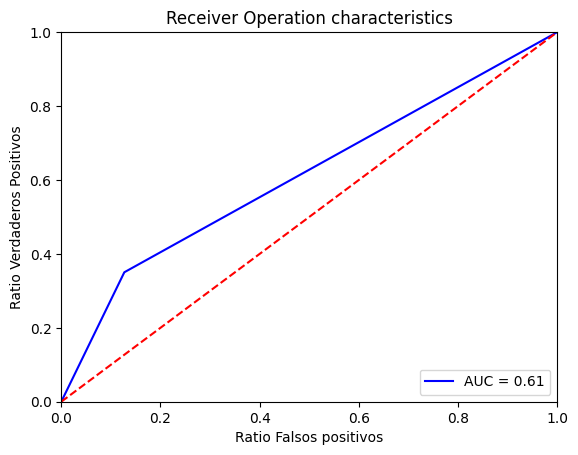

In [83]:
## Area bajo la curva (AUC)
fpr, tpr, threshold = roc_curve(y_test, grid_logreg_pred)
roc_auc = roc_auc_score(y_test, grid_logreg_pred)

# plot

plt.title("Receiver Operation characteristics")
plt.plot(fpr, tpr, 'b', label="AUC = %0.2f" % roc_auc)
plt.legend(loc = "lower right")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("Ratio Verdaderos Positivos")
plt.xlabel("Ratio Falsos positivos")
plt.show()

## Arboles decisiones

In [84]:
param_grid = {
    'max_depth': [2, 3, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'criterion': ['gini', 'entropy']
}

dectree = GridSearchCV(estimator=DecisionTreeClassifier(),
                       param_grid = param_grid, cv=5,
                       scoring='accuracy')

model_tree = dectree.fit(X_train, y_train)

print(f"Best hyperparmeters: {model_tree.best_params_}")
print(f"Best score: {model_tree.best_score_}")

Best hyperparmeters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 2}
Best score: 0.8251655292609046


In [85]:
y_pred_dectree= model_tree.best_estimator_.predict(X_test)
accuracy_dectree = accuracy_score(y_test, y_pred_dectree)
y_prods_dectree = model_tree.predict_proba(X_test)[:,1]

In [86]:
print(f"Accuracy {accuracy_dectree}")

Accuracy 0.8322245322245322


In [87]:
# Matriz confusion
cm_dectree= confusion_matrix(y_test, y_pred_dectree)
print(f"\nMatrix de confusion:")
print(cm_dectree)


Matrix de confusion:
[[2781  256]
 [ 551 1222]]


In [88]:
# Reporte de classificacion
print(f"\nReporte de clasificacion:")
print(classification_report(y_test, y_pred_dectree))


Reporte de clasificacion:
              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87      3037
         1.0       0.83      0.69      0.75      1773

    accuracy                           0.83      4810
   macro avg       0.83      0.80      0.81      4810
weighted avg       0.83      0.83      0.83      4810



In [89]:
# k-fold cross validation
#dectree_accuracies = cross_val_score(estimator= dectree, X = X_train, y = y_train, cv = 5)
#dectree_accuracies

In [90]:
#print("Accuracy: {:.2f} %".format(dectree_accuracies.mean()*100))
#print("Standard Deviation: {:.2f}%".format(dectree_accuracies.std()*100))

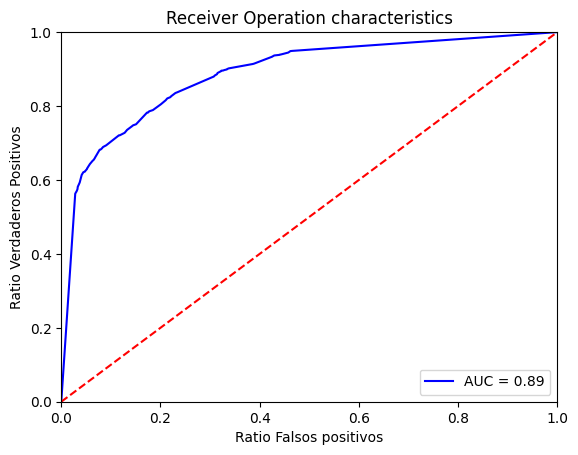

In [91]:
## Area bajo la curva (AUC)
fpr, tpr, threshold = roc_curve(y_test, y_prods_dectree)
roc_auc = roc_auc_score(y_test, y_prods_dectree)

# plot

plt.title("Receiver Operation characteristics")
plt.plot(fpr, tpr, 'b', label="AUC = %0.2f" % roc_auc)
plt.legend(loc = "lower right")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("Ratio Verdaderos Positivos")
plt.xlabel("Ratio Falsos positivos")
plt.show()

## Random Forest

In [ ]:
rf = RandomForestClassifier()
gr_space = {
    'max_depth': [2, 6, 10, 12],
    'n_estimators': [50, 100, 200, 500],
    'max_features': [5, 10, 25, 50],
    'min_samples_leaf': [2, 4, 8, 10]
}
grid_rf = GridSearchCV(rf, gr_space, cv=3, scoring='accuracy')
model_grid_rf = grid_rf.fit(X_train, y_train)

print(f'Best hyperparameters are {model_grid_rf.best_params_}')
print(f'Best score is: {model_grid_rf.best_score_}')

In [ ]:
y_pred_rf = model_grid_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
y_prods_rf = grid_rf.predict_proba(X_test)[:,1]

In [ ]:
print(f"Accuracy {accuracy_rf}")

In [ ]:
# Matriz confusion
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(f"\nMatrix de confusion:")
print(cm_rf)

In [ ]:
# Reporte de classificacion
print(f"\nReporte de clasificacion:")
print(classification_report(y_test, y_pred_rf))

In [ ]:
# k-fold cross validation
#rf_accuracies = cross_val_score(estimator= model_grid_rf, X = X_train, y = y_train, cv = 5)
#rf_accuracies

In [ ]:
#print("Accuracy: {:.2f} %".format(rf_accuracies.mean()*100))
#print("Standard Deviation: {:.2f}%".format(rf_accuracies.std()*100))

In [ ]:
## Area bajo la curva (AUC)
fpr, tpr, threshold = roc_curve(y_test, y_prods_rf)
roc_auc = roc_auc_score(y_test, y_prods_rf)

# plot

plt.title("Receiver Operation characteristics")
plt.plot(fpr, tpr, 'b', label="AUC = %0.2f" % roc_auc)
plt.legend(loc = "lower right")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("Ratio Verdaderos Positivos")
plt.xlabel("Ratio Falsos positivos")
plt.show()

## XGBoost 

In [ ]:
xgb = XGBClassifier()
param_grid = {
    'max_depth': [3, 5, 7, 9, 10, 12],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}
grid_xgb = GridSearchCV(xgb, param_grid, cv=3, scoring='accuracy')
model_grid_xgb = grid_xgb.fit(X_train, y_train)

print(f'Best hyperparameters are {model_grid_xgb.best_params_}')
print(f'Best score is: {model_grid_xgb.best_score_}')

In [ ]:
y_pred_xgb = model_grid_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
y_prods_xgb = model_grid_xgb.predict_proba(X_test)[:,1]

In [ ]:
print(f"Accuracy {accuracy_xgb}")

In [ ]:
# Matriz confusion
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(f"\nMatrix de confusion:")
print(cm_xgb)

In [ ]:
# Reporte de classificacion
print(f"\nReporte de clasificacion:")
print(classification_report(y_test, y_pred_xgb))

In [ ]:
# k-fold cross validation
#xgb_accuracies = cross_val_score(estimator= model_grid_xgb, X = X_train, y = y_train, cv = 5)
#xgb_accuracies

In [ ]:
#print("Accuracy: {:.2f} %".format(xgb_accuracies.mean()*100))
#print("Standard Deviation: {:.2f}%".format(xgb_accuracies.std()*100))

In [ ]:
## Area bajo la curva (AUC)
fpr, tpr, threshold = roc_curve(y_test, y_prods_xgb)
roc_auc = roc_auc_score(y_test, y_prods_rf)

# plot

plt.title("Receiver Operation characteristics")
plt.plot(fpr, tpr, 'b', label="AUC = %0.2f" % roc_auc)
plt.legend(loc = "lower right")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("Ratio Verdaderos Positivos")
plt.xlabel("Ratio Falsos positivos")
plt.show()

## Ensemble

In [ ]:
lg = LogisticRegression(C=6.8, penalty= 'l2', random_state=23)
knn = KNeighborsClassifier(n_neighbors = 5)
svm = SVC(kernel='linear', random_state=23)
rf = RandomForestClassifier(max_depth = 8, max_features = 20, 
                            min_samples_leaf = 2, n_estimators = 200, random_state=23)

my_models = [
    ('Log_Reg', lg),
    ('KNN', knn),
    ('SVM', svm),
    ('RF', rf)  
]

In [ ]:
ensemble = StackingClassifier(estimators=my_models, final_estimator=LogisticRegression(), cv=3)

In [ ]:
ensemble.fit(X_train, y_train)

In [ ]:
ensemble_pred_test = ensemble.predict(X_test)

In [ ]:
accuracy_ensemble = accuracy_score(y_test, ensemble_pred_test)

In [ ]:
print(f"Accuracy {accuracy_ensemble}")

In [ ]:
# Matriz confusion
cm_ensemble = confusion_matrix(y_test, ensemble_pred_test)
print(f"\nMatrix de confusion:")
print(cm_ensemble)

In [ ]:
# Reporte de classificacion
print(f"\nReporte de clasificacion:")
print(classification_report(y_test, ensemble_pred_test))

In [ ]:
# k-fold cross validation
#ensemble_accuracies = cross_val_score(estimator= ensemble, X = X_train, y = y_train, cv = 5)
#ensemble_accuracies

In [ ]:
#print("Accuracy: {:.2f} %".format(ensemble_accuracies.mean()*100))
#print("Standard Deviation: {:.2f}%".format(ensemble_accuracies.std()*100))

In [ ]:
## Area bajo la curva (AUC)
fpr, tpr, threshold = roc_curve(y_test, ensemble_pred_test)
roc_auc = roc_auc_score(y_test, ensemble_pred_test)

# plot

plt.title("Receiver Operation characteristics")
plt.plot(fpr, tpr, 'b', label="AUC = %0.2f" % roc_auc)
plt.legend(loc = "lower right")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("Ratio Verdaderos Positivos")
plt.xlabel("Ratio Falsos positivos")
plt.show()

# Evaluación de los modelos

###  Visualización de la distribución de variable dependiente

In [ ]:
# Visualización de la distribución de clases
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
class_counts = pd.Series(y).value_counts()
axes[0].bar(['Healthy (0)', 'Symptoms AD (1)'], class_counts.values, color=['#e74c3c', '#3498db'])
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Clases')
axes[0].grid(axis='y', alpha=0.3)

# Gráfico de pastel
axes[1].pie(class_counts.values, labels=['Healthy', 'Symptoms AD'],
            autopct='%1.1f%%', startangle=90, colors=['#e74c3c', '#3498db'])
axes[1].set_title('Proporción de Clases')

plt.tight_layout()
plt.show()

In [ ]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10)

## Iniciando los algoritmos

In [ ]:
# Diccionario de modelos
lg = LogisticRegression(C=6.8, penalty= 'l2', random_state=23)
knn = KNeighborsClassifier(n_neighbors = 5)
svc_model = SVC(kernel='linear', random_state=23)
rf = RandomForestClassifier(max_depth = 12, max_features = 20, min_samples_leaf = 2, n_estimators = 200, random_state=23)

my_models = [
    ('Log_Reg', lg),
    ('KNN', knn),
    ('SVC', svc_model),
    ('RF', rf)  
]
models = {
    'Regresión Logística': LogisticRegression(C = 6.8, penalty='l2', random_state=42),
    'Decision tree': DecisionTreeClassifier(criterion ='gini', max_depth = 10, min_samples_split = 10), 
    'Random Forest': RandomForestClassifier(max_depth = 12, max_features = 20, min_samples_leaf = 2, n_estimators = 200),
    'XGBoost': XGBClassifier(learning_rate = 0.1, max_depth = 7, subsample = 0.7),
    'Ensemble':   StackingClassifier(estimators=my_models)
}



print("Algoritmos configurados:")
for name in models.keys():
    print(f"  - {name}")

## Entrenamientos y evaluaciones

In [ ]:
# Diccionarios para almacenar resultados
results = {
    'Modelo': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'AUC-ROC': [],
    'Tiempo (s)': []
}

predictions = {}
probabilities = {}

print("Iniciando entrenamiento de modelos...\n")

for name, model in models.items():
    print(f"Entrenando: {name}")

    # Medir tiempo de entrenamiento
    start_time = time.time()

    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Realizar predicciones
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calcular tiempo
    elapsed_time = time.time() - start_time

    # Almacenar predicciones
    predictions[name] = y_pred
    probabilities[name] = y_prob

    # Calcular métricas
    results['Modelo'].append(name)
    results['Accuracy'].append(accuracy_score(y_test, y_pred))
    results['Precision'].append(precision_score(y_test, y_pred))
    results['Recall'].append(recall_score(y_test, y_pred))
    results['F1-Score'].append(f1_score(y_test, y_pred))
    results['AUC-ROC'].append(roc_auc_score(y_test, y_prob))
    results['Tiempo (s)'].append(elapsed_time)

    print(f"  Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"  Tiempo: {elapsed_time:.4f}s\n")

print("Entrenamiento completado.")

### Tabla de métricas

In [ ]:
df_resultados = pd.DataFrame(results)

df_resultados = df_resultados.sort_values('F1-Score', ascending=False).reset_index(drop=True)

visualizacion_df = df_resultados.copy()
for col in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']:
    visualizacion_df[col] = visualizacion_df[col].round(3)
visualizacion_df['Tiempo (s)'] = visualizacion_df['Tiempo (s)'].round(3)

print("\n Tabla comparativa de Rendimientos:\n")
visualizacion_df

### Visualizaciones comparativas de las estadisticas

In [ ]:
# grafico de barras agrupadas para las metricas
fig, ax = plt.subplots(figsize=(16, 10))

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
x = np.arange(len(df_resultados['Modelo']))
width = 0.15

for i, metric in enumerate(metrics_to_plot):
    offset = width * (i - 2)
    ax.bar(x + offset, df_resultados[metric], width, label=metric)

ax.set_xlabel('Modelo', fontsize=12)
ax.set_ylabel('Valor de Métrica', fontsize=12)
ax.set_title('Comparación de Métricas por Modelo', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(df_resultados['Modelo'], rotation=45, ha='right')
ax.legend(loc='upper right')
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0.85, 1.0])

plt.tight_layout()
plt.show()

In [ ]:
# Seleccionar top 4 modelos por F1-Score
top_models = df_resultados.nlargest(4, 'F1-Score')

categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
N = len(categories)
#pi=3.14

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))

for idx, row in top_models.iterrows():
    values = row[categories].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, 'o-', linewidth=2, label=row['Modelo'])
    ax.fill(angles, values, alpha=0.15)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=10)
ax.set_ylim(0.85, 1.0)
ax.set_title('Comparación Multidimensional de Modelos\n(Top 4)',
             size=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax.grid(True)

plt.tight_layout()
plt.show()

## Curvas de aprendizaje y recomendaciones de umbrales de decision

In [ ]:
# Función para análisis rápido de umbrales
def quick_threshold_analysis(models_dict, X_test, y_test):
    """
    Análisis rápido de umbrales para todos los modelos
    """
    results = []
    
    for model_name, model in models_dict.items():
        if hasattr(model, 'predict_proba'):
            y_proba = model.predict_proba(X_test)[:, 1]
            
            # Calcular F1 para diferentes umbrales
            thresholds = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
            best_f1 = 0
            best_thresh = 0.5
            
            for thresh in thresholds:
                y_pred = (y_proba >= thresh).astype(int)
                f1 = f1_score(y_test, y_pred, zero_division=0)
                
                if f1 > best_f1:
                    best_f1 = f1
                    best_thresh = thresh
            
            # F1 con umbral por defecto (0.5)
            y_pred_default = (y_proba >= 0.5).astype(int)
            f1_default = f1_score(y_test, y_pred_default, zero_division=0)
            
            results.append({
                'Modelo': model_name,
                'Umbral_recomendado': best_thresh,
                'F1_umbral_recomendado': best_f1,
                'F1_umbral_05': f1_default,
                'Mejora_%': ((best_f1 - f1_default)/f1_default*100) if f1_default > 0 else 0
            })
    
    df_thresholds = pd.DataFrame(results)
    df_thresholds = df_thresholds.sort_values('F1_umbral_recomendado', ascending=False)
    
    return df_thresholds


def entrenar_y_evaluar_modelos(X_train, X_test, y_train, y_test):
    """
    Función completa para entrenar modelos y realizar análisis de umbrales
    """
    print("\n" + "="*60)
    print("ENTRENANDO MODELOS...")
    print("="*60)
    
    # Entrenar todos los modelos
    for model_name, model in models.items():
        print(f"Entrenando: {model_name}")
        model.fit(X_train, y_train)
    
    print("\n" + "="*60)
    print("ANÁLISIS DE UMBRALES")
    print("="*60)
    
    # Realizar análisis de umbrales
    df_thresholds = quick_threshold_analysis(models, X_test, y_test)
    
    # Mostrar resultados
    print("\nANÁLISIS RÁPIDO DE UMBRALES:")
    print("="*60)
    print(df_thresholds.to_string(index=False))
    
    return models, df_thresholds

In [ ]:
modelos_entrenados, resultados = entrenar_y_evaluar_modelos(X_train, X_test, y_train, y_test)

## Matrices de confusión

In [ ]:
# Crear subplots para matrices de confusión
n_models = len(models)
fig, axes = plt.subplots(3, 3, figsize=(12, 10))
axes = axes.ravel()

for idx, (name, y_pred) in enumerate(predictions.items()):
    cm = confusion_matrix(y_test, y_pred)

    # Normalizar la matriz de confusión
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Healthy', 'Symptoms AD'],
                yticklabels=['Healthy', 'Symptoms AD'],
                ax=axes[idx], cbar=False)

    axes[idx].set_title(f'{name}\nAccuracy: {accuracy_score(y_test, y_pred):.4f}',
                       fontweight='bold')
    axes[idx].set_ylabel('Clase Real')
    axes[idx].set_xlabel('Clase Predicha')

# Ocultar subplots vacíos
for idx in range(n_models, len(axes)):
    axes[idx].axis('off')

plt.suptitle('Matrices de Confusión por Modelo', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

## Curvas ROC y comparativas del AUC

In [ ]:
# Grafico de curvas ROC
plt.figure(figsize=(12,8))

for name, y_prod in probabilities.items():
    fpr, tpr, _ = roc_curve(y_test, y_prod)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--', lw = 2, label='clasificador aleatorio (AUC = 0.50)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivo (TPR)', fontsize=12)
plt.title('Curva ROC - Comparaciones de modelos', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=9)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()